#### Combining persistence stat with overdose data

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
overdose_df = pd.read_excel('/home/h6x/git_projects/ornl-svi-data-processing/raw_data/HepVu_County_Opioid_Indicators_05DEC22.xlsx')

In [4]:
overdose_df.head()

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
0,1001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6
1,1003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4
2,1005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6
3,1007,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3
4,1009,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2


In [5]:
# make GEO ID a string
overdose_df['GEO ID'] = overdose_df['GEO ID'].astype(str)

In [6]:
# if GEO ID is less than 5 characters, add leading zeros
overdose_df['GEO ID'] = overdose_df['GEO ID'].apply(lambda x: x.zfill(5))

In [7]:
overdose_df.head()

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
0,01001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6
1,01003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4
2,01005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6
3,01007,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3
4,01009,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2


In [8]:
# filter the data to only include the columns we need
overdose_df = overdose_df[['GEO ID','Narcotic Overdose Mortality Rate 2018']]

In [9]:
# rename the column "Narcotic Overdose Mortality Rate 2018	" to "od_rate"
overdose_df.rename(columns={'Narcotic Overdose Mortality Rate 2018':'od_rate'}, inplace=True)

In [10]:
overdose_df.head()

,GEO ID,od_rate
0,01001,10.9
1,01003,14.9
2,01005,5.2
3,01007,23.1
4,01009,19.9


### Lets import svi data and experiment number of census in a county

In [11]:
svi_geo_df = gpd.read_file('/home/h6x/git_projects/ornl-svi-data-processing/raw_data/svi/2018/SVI2018_US_tract.gdb')

In [12]:
svi_geo_df.shape

(72837, 127)

In [13]:
svi_geo_df.head(3)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Length,Shape_Area,geometry
0,01,ALABAMA,AL,01015,Calhoun,01015981901,"Census Tract 9819.01, Calhoun County, Alabama",24.243865,0,12,...,-999,-999,0,12,-999.0,-999.0,656,0.339400,0.006105,"MULTIPOLYGON (((-86.01323 33.68426, -86.01224 ..."
1,01,ALABAMA,AL,01015,Calhoun,01015981902,"Census Tract 9819.02, Calhoun County, Alabama",34.646714,0,12,...,-999,-999,0,12,-999.0,-999.0,146,0.420459,0.008752,"MULTIPOLYGON (((-86.01730 33.69662, -86.01704 ..."
2,01,ALABAMA,AL,01015,Calhoun,01015981903,"Census Tract 9819.03, Calhoun County, Alabama",13.926276,0,12,...,-999,-999,0,12,-999.0,-999.0,0,0.330164,0.003508,"MULTIPOLYGON (((-85.78501 33.66554, -85.78318 ..."


In [14]:
# get the unique FIPS codes to a list
fips_list = svi_geo_df['STCNTY'].unique()

In [15]:
# create a empty new dataframe with the FIPS AND GEOID and census_count
new_df = pd.DataFrame(columns=['STCNTY','census_count'])

In [16]:
# get the count of census tracts for each FIPS code
for fips in fips_list:

    new_row = pd.DataFrame({'STCNTY':fips, 'census_count':len(svi_geo_df[svi_geo_df['STCNTY'] == fips])}, index=[0])
    new_df = pd.concat([new_df, new_row], ignore_index=True)

In [17]:
new_df.head(3)

,STCNTY,census_count
0,01015,31
1,01097,115
2,01117,48


In [18]:
new_df.shape

(3142, 2)

In [19]:
# combine new_df with overdose_df by STCNTY from new_df and GEO ID from overdose_df
combined_df = pd.merge(new_df, overdose_df, left_on='STCNTY', right_on='GEO ID')

In [20]:
combined_df.shape

(3141, 4)

In [21]:
combined_df = combined_df.sort_values(by='census_count', ascending=False)

In [22]:
filtered_df = combined_df.iloc[5:]

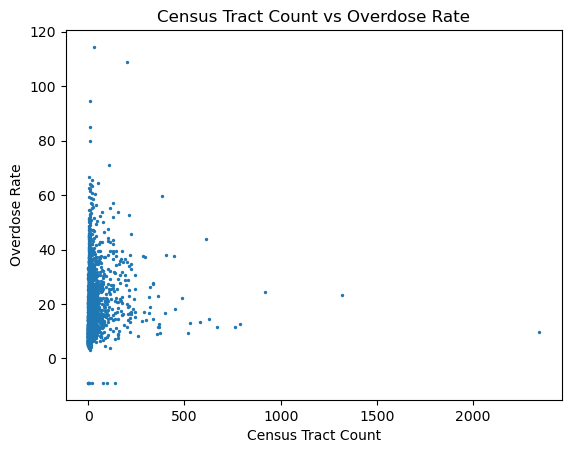

In [23]:
# plot a scatter plot of census_count vs od_rate
plt.scatter(combined_df['census_count'], combined_df['od_rate'],s=2)
plt.xlabel('Census Tract Count')
plt.ylabel('Overdose Rate')
plt.title('Census Tract Count vs Overdose Rate')
plt.show()

### Let's import persistence stat

In [24]:
# import the csv making sure the GEOID is a string
persistent_df = pd.read_csv('/home/h6x/git_projects/ornl-svi-data-processing/experiment_4/census_complex_info.csv', dtype={'STCNTY':str})

In [25]:
persistent_df.head()

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,census_count
0,GA,13009,EP_POV,9,9,0,1,0,0.0,8.0,9.0
1,GA,13009,EP_UNEMP,9,9,1,1,0,1.0,8.0,9.0
2,GA,13009,EP_NOHSDP,9,9,1,1,0,1.0,8.0,9.0
3,GA,13009,EP_UNINSUR,9,9,1,1,0,1.0,8.0,9.0
4,GA,13009,EP_AGE65,9,9,1,1,0,1.0,8.0,9.0


In [26]:
per_pov = persistent_df[persistent_df['Variable'] == 'EP_POV']

In [27]:
# drop column census_count and Variable
per_pov = per_pov.drop(['census_count','Variable'], axis=1)

In [28]:
per_pov

,State,STCNTY,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count
0,GA,13009,9,9,0,1,0,0.0,8.0
15,GA,13013,18,18,1,1,0,1.0,17.0
30,GA,13015,15,15,1,1,0,1.0,14.0
45,GA,13017,5,5,0,1,0,0.0,4.0
60,GA,13019,6,6,0,1,0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
47025,HI,15009,34,33,2,2,0,2.0,31.0
47040,HI,15005,1,0,0,0,0,0.0,0.0
47055,DE,10001,32,32,1,1,0,1.0,31.0
47070,DE,10003,129,129,12,1,0,12.0,128.0


In [29]:
# combine per_pov with combined_df by matching STCNTY
final_df = pd.merge(combined_df, per_pov, on='STCNTY')


In [30]:
final_df.head()

,STCNTY,census_count,GEO ID,od_rate,State,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count
0,06037,2344,06037,9.8,CA,2315,2314,307,3,15,292.0,2311.0
1,17031,1318,17031,23.4,IL,1315,1315,156,1,2,154.0,1314.0
2,04013,916,04013,24.5,AZ,908,908,119,1,6,113.0,907.0
3,48201,786,48201,12.7,TX,783,783,91,1,3,88.0,782.0
4,36047,761,36047,11.7,NY,749,749,86,1,5,81.0,748.0


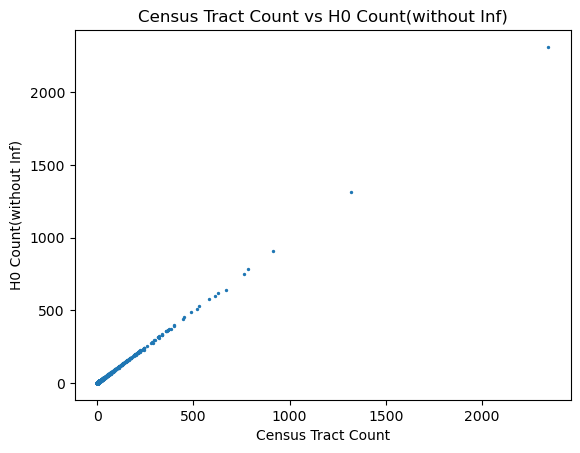

In [31]:
# plot a scatter plot of census_count vs od_rate
plt.scatter(final_df['census_count'], final_df['H0_withou_inf_count'],s=2)
plt.xlabel('Census Tract Count')
plt.ylabel('H0 Count(without Inf)')
plt.title('Census Tract Count vs H0 Count(without Inf)')
plt.show()

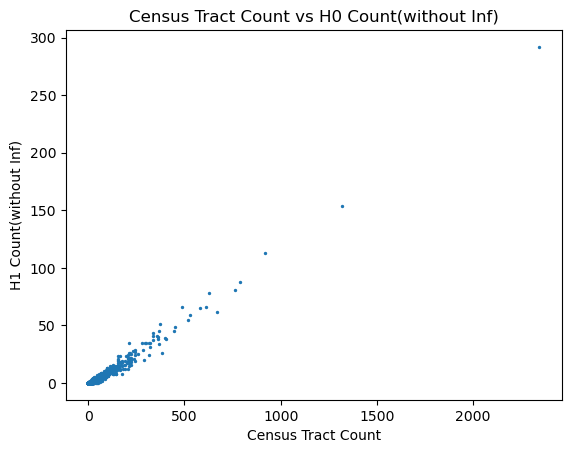

In [32]:
# plot a scatter plot of census_count vs od_rate
plt.scatter(final_df['census_count'], final_df['H1_withou_inf_count'],s=2)
plt.xlabel('Census Tract Count')
plt.ylabel('H1 Count(without Inf)')
plt.title('Census Tract Count vs H0 Count(without Inf)')
plt.show()

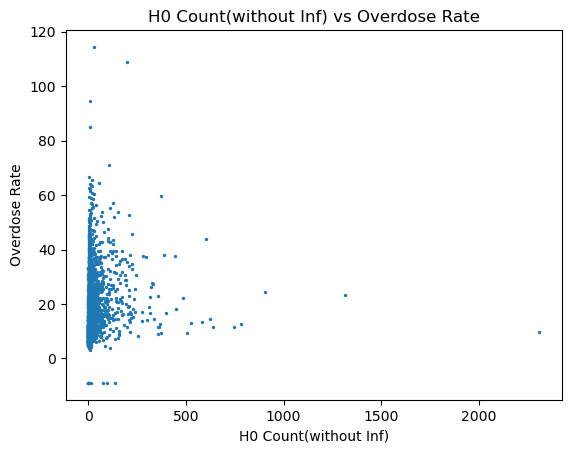

In [33]:
# plot a scatter plot of census_count vs od_rate
plt.scatter(final_df['H0_withou_inf_count'], final_df['od_rate'],s=2)
plt.xlabel('H0 Count(without Inf)')
plt.ylabel('Overdose Rate')
plt.title('H0 Count(without Inf) vs Overdose Rate')
plt.show()

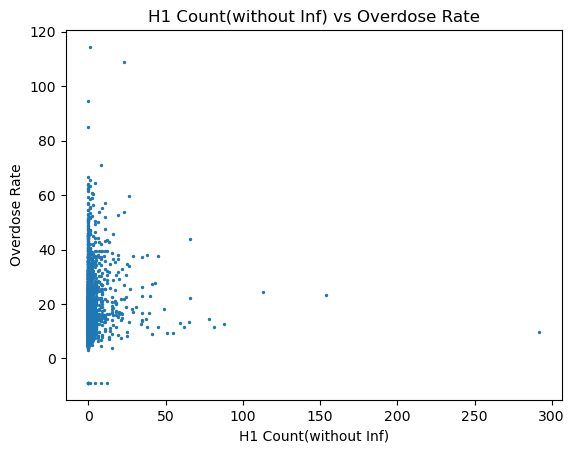

In [34]:
# plot a scatter plot of census_count vs od_rate
plt.scatter(final_df['H1_withou_inf_count'], final_df['od_rate'],s=2)
plt.xlabel('H1 Count(without Inf)')
plt.ylabel('Overdose Rate')
plt.title('H1 Count(without Inf) vs Overdose Rate')
plt.show()

In [35]:
final_df.head()

,STCNTY,census_count,GEO ID,od_rate,State,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count
0,06037,2344,06037,9.8,CA,2315,2314,307,3,15,292.0,2311.0
1,17031,1318,17031,23.4,IL,1315,1315,156,1,2,154.0,1314.0
2,04013,916,04013,24.5,AZ,908,908,119,1,6,113.0,907.0
3,48201,786,48201,12.7,TX,783,783,91,1,3,88.0,782.0
4,36047,761,36047,11.7,NY,749,749,86,1,5,81.0,748.0


In [36]:
# sort the final_df by od_rate
final_df = final_df.sort_values(by='od_rate', ascending=False)

In [37]:
final_df[['STCNTY','census_count','od_rate','H0_withou_inf_count','H1_withou_inf_count']].head(30)

,STCNTY,census_count,od_rate,H0_withou_inf_count,H1_withou_inf_count
466,54011,29,114.4,28.0,1.0
61,24510,200,108.8,197.0,23.0
1342,54005,8,94.7,7.0,0.0
1338,54047,8,85.1,7.0,0.0
138,29510,106,70.9,105.0,8.0
1684,54109,6,66.7,5.0,0.0
731,54081,17,65.6,16.0,1.0
279,54039,53,64.5,52.0,4.0
1266,54045,9,64.1,8.0,0.0
813,06033,15,63.7,14.0,0.0


In [38]:
base_path_npy = '/home/h6x/git_projects/ornl-svi-data-processing/experiment_3/processed_data_1/npy_all_variables/EP_POV/'

In [39]:
file_name = '54011.npy'
# import the numpy array
data = np.load(base_path_npy + file_name)

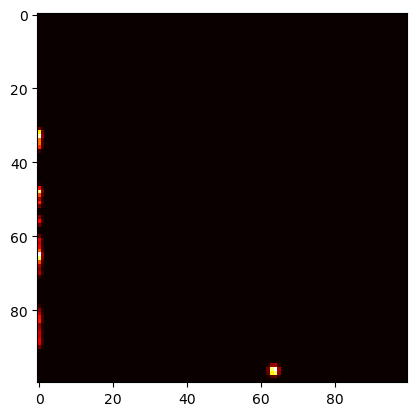

In [40]:
# plot the data
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

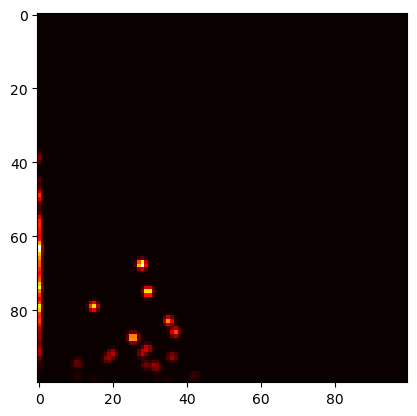

In [41]:
file_name = '24510.npy'
# import the numpy array
data = np.load(base_path_npy + file_name)

# plot the data
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

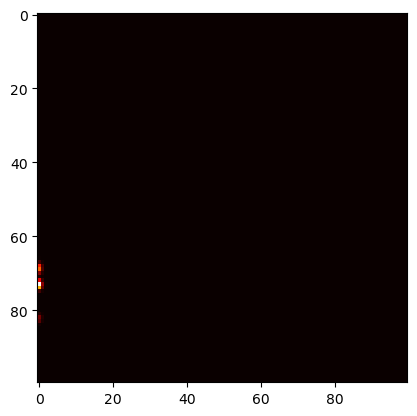

In [ ]:
file_name = '54005.npy'
# import the numpy array
data = np.load(base_path_npy + file_name)

# plot the data
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

In [43]:
final_df.shape

(3139, 12)

In [44]:
# get top 8 counties with highest overdose rate STCNTY to a list
top_counties = final_df['STCNTY'].head(8).tolist()
bottom_counties = final_df['STCNTY'].tail(8).tolist()

# get 15 to 22 from tail
bottom_counties = final_df['STCNTY'].iloc[2600:2607].tolist()

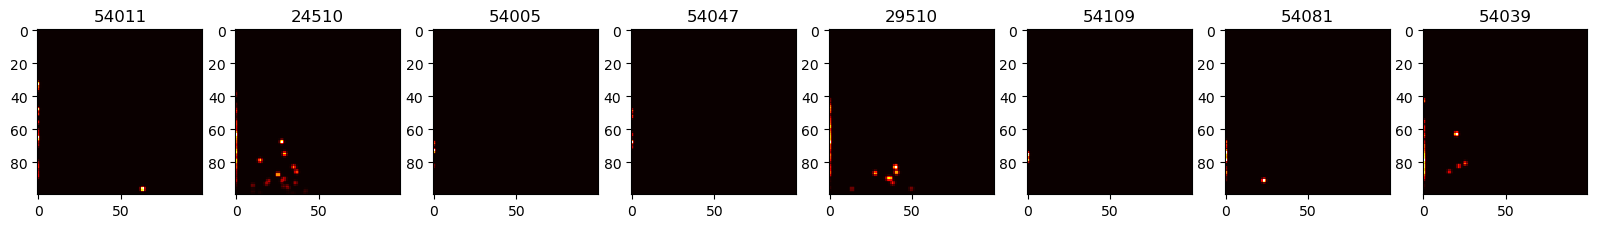

In [45]:
# plot the data for top 8 counties horizontally

fig, axs = plt.subplots(1, 8, figsize=(20, 10))

for i, ax in enumerate(axs):
    data = np.load(base_path_npy + top_counties[i] + '.npy')
    ax.imshow(data, cmap='hot', interpolation='nearest')
    ax.set_title(top_counties[i])

plt.show()

In [47]:
len(bottom_counties)

7

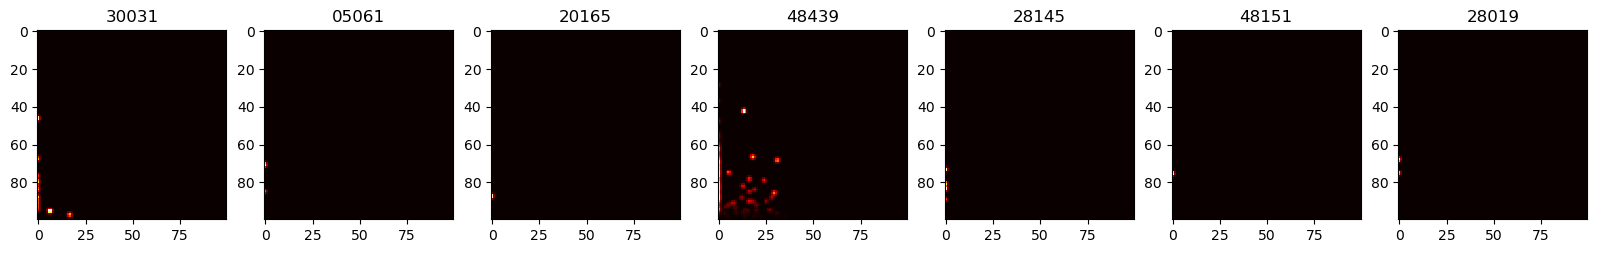

In [48]:
fig, axs = plt.subplots(1, 7, figsize=(20, 10))

for i, ax in enumerate(axs):
    data = np.load(base_path_npy + bottom_counties[i] + '.npy')
    ax.imshow(data, cmap='hot', interpolation='nearest')
    ax.set_title(bottom_counties[i])

plt.show()

In [49]:
# get the first column of the numpy array for top 8 counties and get the mean for each row
top_counties_mean = []

for county in top_counties:
    data = np.load(base_path_npy + county + '.npy')
    # get the FIRST column of the numpy array
    data = data[:,0]
    top_counties_mean.append(np.mean(data))

top_counties_mean                           



[0.14714611681891376,
 0.2024810071915135,
 0.7634229938936811,
 1.0503075614564128,
 0.2138378914512961,
 0.47829023791247577,
 0.10296277145138155,
 0.19775746433611033]

In [50]:
# get the first column of the numpy array for top 8 counties and get the mean for each row
top_counties_mean = []

for county in bottom_counties:
    data = np.load(base_path_npy + county + '.npy')
    # get the FIRST column of the numpy array
    data = data[:,0]
    top_counties_mean.append(np.mean(data))

top_counties_mean    

[0.127441911655078,
 0.1699807582551648,
 0.05014069718050803,
 0.27875847977619606,
 0.37611754411842435,
 0.10028139436101607,
 0.2184903481980541]

In [52]:
# combine first column for top 8 counties

matrix = np.zeros((100, len(top_counties)))

for county in top_counties:
    data = np.load(base_path_npy + county + '.npy')
    # get the FIRST column of the numpy array
    data = data[:,0]
    # combine 
    matrix[:,top_counties.index(county)] = data

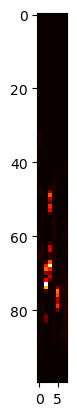

In [55]:
# plot the matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

In [56]:
top_counties = final_df['STCNTY'].head(100).tolist()

matrix = np.zeros((100, len(top_counties)))

for county in top_counties:
    data = np.load(base_path_npy + county + '.npy')
    # get the FIRST column of the numpy array
    data = data[:,0]
    # combine 
    matrix[:,top_counties.index(county)] = data

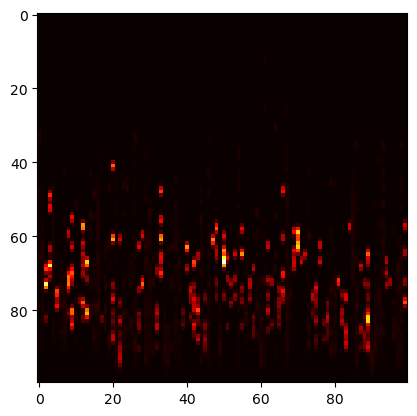

In [57]:
# plot the matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

Missing file: 31163
Missing file: 31015
Missing file: 38043
Missing file: 31073
Missing file: 46111
Missing file: 38051
Missing file: 46043
Missing file: 38039
Missing file: 38047
Missing file: 46097
Missing file: 46089
Missing file: 46061
Missing file: 38031
Missing file: 02275
Missing file: 02230
Missing file: 02105
Missing file: 02195


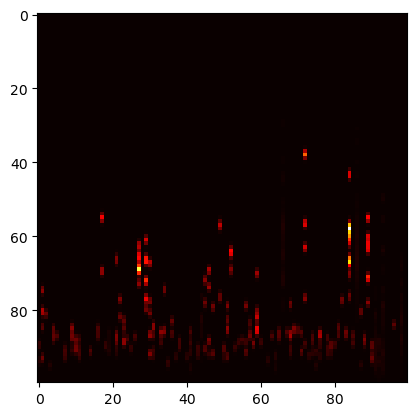

In [59]:
top_counties = final_df['STCNTY'].tail(100).tolist()

matrix = np.zeros((100, len(top_counties)))

for county in top_counties:

    # add catch for missing files
    try:
        data = np.load(base_path_npy + county + '.npy')
        data = data[:,0]
        # combine 
        matrix[:,top_counties.index(county)] = data
    except:
        print('Missing file:', county)
        continue
    
    

# plot the matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

In [60]:
top_counties = final_df['STCNTY'].tolist()

matrix = np.zeros((100, len(top_counties)))

for county in top_counties:

    # add catch for missing files
    try:
        data = np.load(base_path_npy + county + '.npy')
        data = data[:,0]
        # combine 
        matrix[:,top_counties.index(county)] = data
    except:
        print('Missing file:', county)
        continue

Missing file: 35019
Missing file: 06091
Missing file: 51720
Missing file: 49055
Missing file: 35033
Missing file: 21201
Missing file: 47137
Missing file: 35003
Missing file: 32015
Missing file: 32029
Missing file: 48023
Missing file: 49009
Missing file: 08027
Missing file: 32027
Missing file: 06003
Missing file: 35011
Missing file: 37095
Missing file: 53069
Missing file: 40057
Missing file: 20019
Missing file: 49033
Missing file: 49031
Missing file: 08011
Missing file: 35021
Missing file: 08033
Missing file: 15005
Missing file: 08057
Missing file: 20049
Missing file: 02060
Missing file: 37177
Missing file: 32009
Missing file: 08079
Missing file: 32011
Missing file: 08025
Missing file: 51045
Missing file: 08111
Missing file: 48301
Missing file: 02164
Missing file: 08053
Missing file: 51091
Missing file: 16015
Missing file: 13125
Missing file: 08047
Missing file: 35059
Missing file: 08091
Missing file: 53023
Missing file: 30019
Missing file: 51017
Missing file: 48383
Missing file: 48447


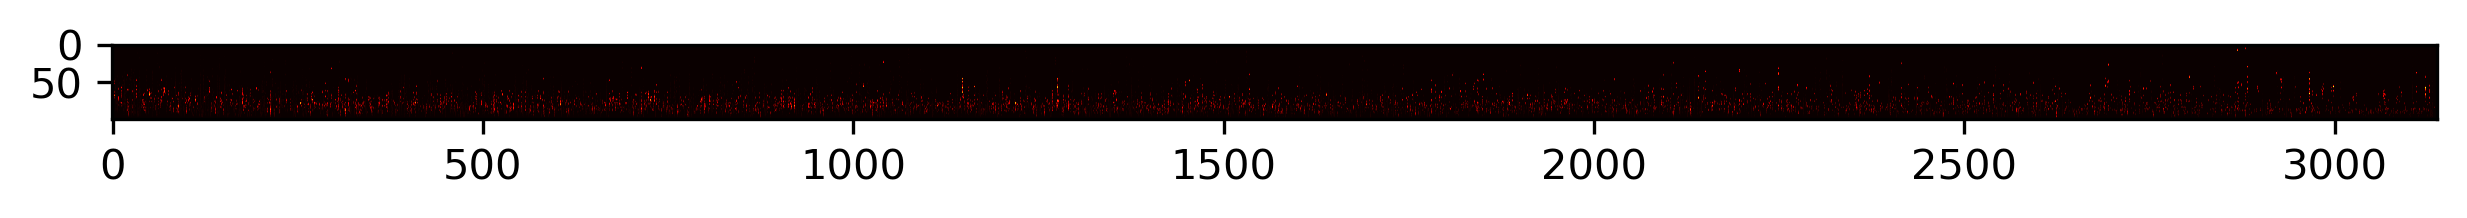

In [68]:
# Plot the matrix with a reasonable figure size and DPI
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

Missing file: 35019
Missing file: 06091
Missing file: 51720


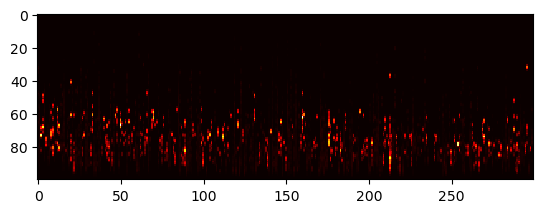

In [69]:
top_counties = final_df['STCNTY'].iloc[0:300].tolist()

matrix = np.zeros((100, len(top_counties)))

for county in top_counties:

    # add catch for missing files
    try:
        data = np.load(base_path_npy + county + '.npy')
        data = data[:,0]
        # combine 
        matrix[:,top_counties.index(county)] = data
    except:
        print('Missing file:', county)
        continue
    
    

# plot the matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

Missing file: 48413
Missing file: 41021
Missing file: 48433
Missing file: 29227
Missing file: 51678
Missing file: 20187
Missing file: 31123
Missing file: 30011
Missing file: 48229
Missing file: 48283
Missing file: 46017
Missing file: 31087
Missing file: 31049
Missing file: 20097
Missing file: 48169
Missing file: 38023
Missing file: 48205
Missing file: 38095
Missing file: 48263
Missing file: 48125
Missing file: 30033
Missing file: 38029
Missing file: 48435
Missing file: 48311
Missing file: 31069
Missing file: 48385
Missing file: 46021
Missing file: 31135
Missing file: 38007
Missing file: 38033
Missing file: 20199
Missing file: 30025
Missing file: 48261
Missing file: 31133
Missing file: 31071
Missing file: 38025
Missing file: 28055
Missing file: 20023
Missing file: 48417
Missing file: 20137
Missing file: 30071
Missing file: 46105
Missing file: 20203
Missing file: 46055
Missing file: 46095
Missing file: 31057
Missing file: 31085
Missing file: 20105
Missing file: 48095
Missing file: 46063


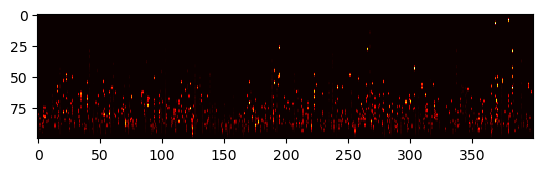

In [70]:
top_counties = final_df['STCNTY'].iloc[2500:2900].tolist()

matrix = np.zeros((100, len(top_counties)))

for county in top_counties:

    # add catch for missing files
    try:
        data = np.load(base_path_npy + county + '.npy')
        data = data[:,0]
        # combine 
        matrix[:,top_counties.index(county)] = data
    except:
        print('Missing file:', county)
        continue
    
    

# plot the matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()